In [2]:
import yfinance as yf
import pandas as pd
import numpy as np  # Import numpy
import matplotlib.pyplot as plt

In [3]:
stock = 'RELIANCE.NS'
data = yf.download(stock, start='2024-04-04', end='2024-10-04')

[*********************100%***********************]  1 of 1 completed


In [4]:
data['50_MA'] = data['Adj Close'].rolling(window=50).mean()
data['200_MA'] = data['Adj Close'].rolling(window=200).mean()

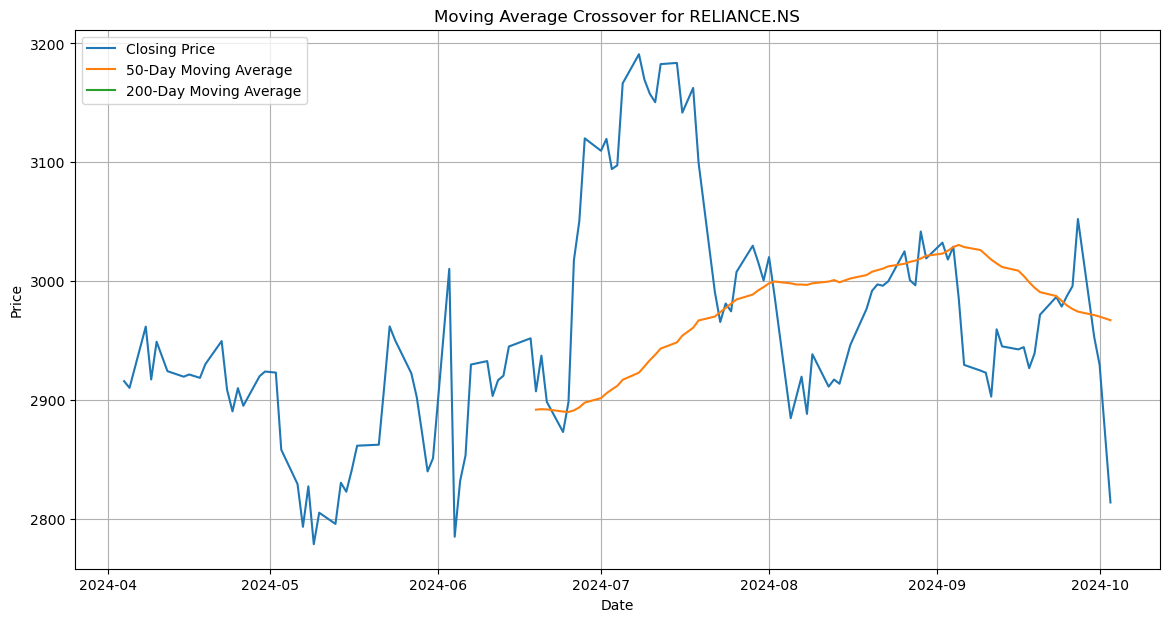

In [5]:
plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='Closing Price')
plt.plot(data['50_MA'], label='50-Day Moving Average')
plt.plot(data['200_MA'], label='200-Day Moving Average')
plt.title(f'Moving Average Crossover for {stock}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [7]:
data['Signal'] = 0  # Default to 0
data.iloc[50:, data.columns.get_loc('Signal')] = np.where(data['50_MA'][50:] > data['200_MA'][50:], 1, -1)

In [8]:
data['Position'] = data['Signal'].shift()

In [9]:
data['Strategy_Return'] = data['Position'] * data['Adj Close'].pct_change()

In [10]:
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod() - 1
data['Cumulative_Buy_Hold_Return'] = (1 + data['Adj Close'].pct_change()).cumprod() - 1

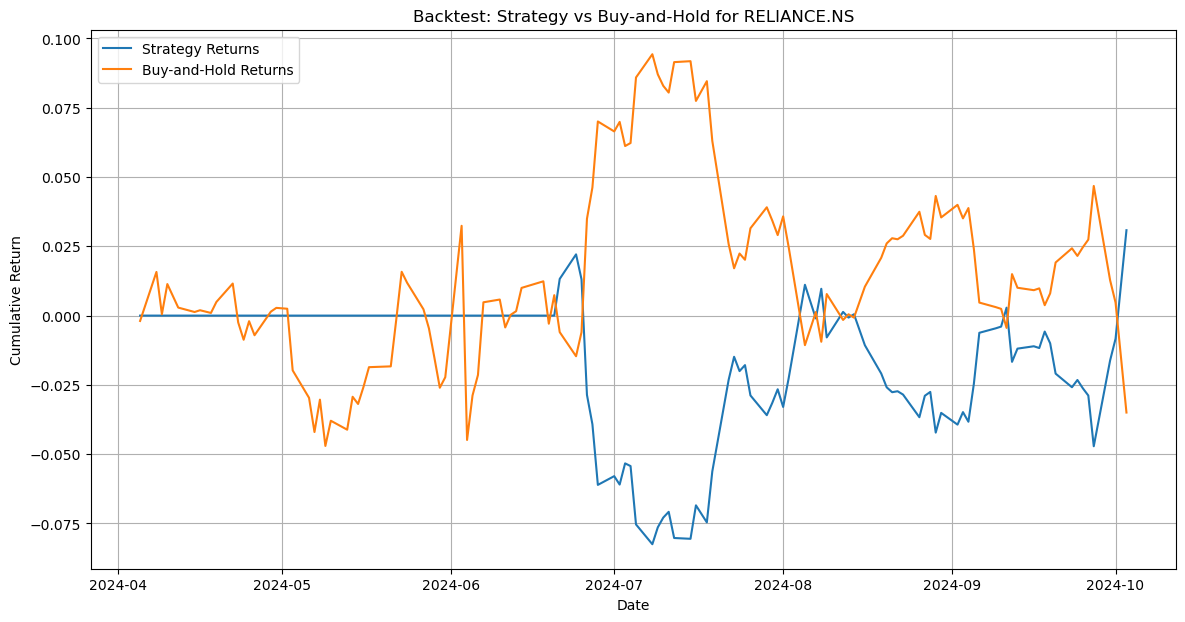

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative_Strategy_Return'], label='Strategy Returns')
plt.plot(data['Cumulative_Buy_Hold_Return'], label='Buy-and-Hold Returns')
plt.title(f'Backtest: Strategy vs Buy-and-Hold for {stock}')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [12]:
print("Final Strategy Return: ", data['Cumulative_Strategy_Return'].iloc[-1])
print("Final Buy-and-Hold Return: ", data['Cumulative_Buy_Hold_Return'].iloc[-1])

Final Strategy Return:  0.03081633390803118
Final Buy-and-Hold Return:  -0.034981155408124076
